In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set file paths
input_path = r'F:\Profile_Me\Profile_2_Data_Analyst\Projects\Project_8_\Dataset\Recruitment_Data.csv'
output_path = r'F:\Profile_Me\Profile_2_Data_Analyst\Projects\Project_8_\After_EDA\Cleaned_Recruitment_Data_New.xlsx'

# Load dataset
df = pd.read_csv(input_path, parse_dates=['ApplicationDate', 'JoiningDate'])

### Basic EDA - Cleaning, Feature Engineering

In [20]:
# Initial clean-up
df['TimeToHire'] = df['TimeToHire'].fillna(0).astype(int)
df['OfferedCTC'] = df['OfferedCTC'].fillna(0).astype(int)
df['Remarks'] = df['Remarks'].fillna("No remarks")
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'], errors='coerce')

# Feature Engineering
df['HiringSpeed'] = pd.cut(df['TimeToHire'], 
                           bins=[-1, 15, 30, 60], 
                           labels=['Fast', 'Average', 'Slow'])

df['Month'] = df['ApplicationDate'].dt.to_period('M').astype(str)
df['Joined'] = df['Stage'] == 'Joined'

# Save cleaned file
df.to_excel(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: F:\Profile_Me\Profile_2_Data_Analyst\Projects\Project_8_\After_EDA\Cleaned_Recruitment_Data_New.xlsx


# Summary of Dataset

-----------DB Summary----------- 

- Total Records: 10000
- Offer Acceptance Rate: 79.2%
- Hiring Probability: 1.98%
- Diversity Representation: 44.57%


-----------Stage Funnel Counts----------- 

Total Applicants        10000
Rejected at screening    5000
Screened                 3750
Interviewed              1000
Offered                   250
Joined                    198
Name: Stage, dtype: int32


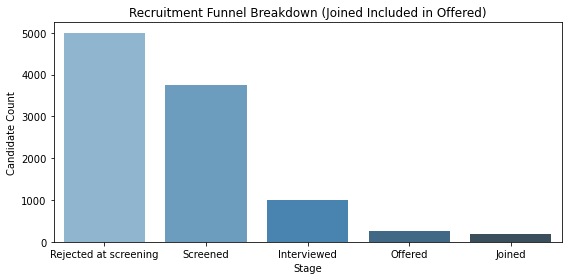

In [40]:
# Funnel conversion
stage_order = ['Rejected at screening', 'Screened', 'Interviewed', 'Offered', 'Joined']
funnel = df['Stage'].value_counts().reindex(stage_order).fillna(0).astype(int)

# Hired count
hired_count = df[df['HireStatus'] == 'Hired'].shape[0]

# Offer acceptance rate
total_offered = df[df['Stage'].isin(['Offered', 'Joined'])].shape[0]
offer_acceptance_rate = round(hired_count / total_offered * 100, 2) if total_offered else 0

# Hiring probability
hiring_probability = round(hired_count / len(df) * 100, 2)

# Diversity %
diversity_pct = round(df[df['DiversityFlag'] == 'Yes'].shape[0] / len(df) * 100, 2)

# ✨ Print Required Summary
print("-----------DB Summary----------- \n")
print("- Total Records:", len(df))
print(f"- Offer Acceptance Rate: {offer_acceptance_rate}%")
print(f"- Hiring Probability: {hiring_probability}%")
print(f"- Diversity Representation: {diversity_pct}%")
print("\n")


# Funnel chart
# Create a modified funnel for plotting only
plot_funnel = funnel.copy()
plot_funnel['Offered'] += plot_funnel['Joined']
print("-----------Stage Funnel Counts----------- \n")
print("Total Applicants       ",len(df))
print(plot_funnel)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=plot_funnel.index, y=plot_funnel.values, palette='Blues_d')
plt.title('Recruitment Funnel Breakdown (Joined Included in Offered)')
plt.xlabel('Stage')
plt.ylabel('Candidate Count')
plt.tight_layout()
plt.show()



# THE END